# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.count()

,0
Unnamed: 0.1,4324
Unnamed: 0,4324
Organisation,4324
Location,4324
Date,4324
Detail,4324
Rocket_Status,4324
Price,964
Mission_Status,4324


In [8]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [9]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [10]:
print("The NaN values are as follows")
print(df_data.isna().sum())
print(" ")
print(" ")
print(" ")
print(f"The total duplicated values are {df_data.duplicated().sum()}.")

The NaN values are as follows
Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64
 
 
 
The total duplicated values are 0.


In [11]:
df_data.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [12]:
new_df = df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
new_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [13]:
new_df.dropna(inplace=True)
print(new_df.isna().sum())

Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64


In [14]:
new_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


## Descriptive Statistics

In [15]:
new_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [16]:
new_df.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success
4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63.23,Failure


In [17]:
new_df.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,964,964,964,964,964,964,964
unique,25,56,963,962,2,56,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,450.0,Success
freq,158,120,2,2,586,136,910


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [18]:
org_values = new_df['Organisation'].value_counts()
org_values

,count
Organisation,
CASC,158
NASA,149
SpaceX,99
ULA,98
Arianespace,96
Northrop,83
ISRO,67
MHI,37
VKS RF,33


In [19]:
print(org_values.index)

Index(['CASC', 'NASA', 'SpaceX', 'ULA', 'Arianespace', 'Northrop', 'ISRO',
       'MHI', 'VKS RF', 'US Air Force', 'Roscosmos', 'Kosmotras', 'ILS',
       'Eurockot', 'Rocket Lab', 'Martin Marietta', 'Lockheed', 'Boeing',
       'JAXA', 'RVSN USSR', 'Sandia', 'Virgin Orbit', 'ESA', 'ExPace', 'EER'],
      dtype='object', name='Organisation')


In [20]:
fig = px.pie(org_values, names=org_values.index, values='count')
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [21]:
new_df['Rocket_Status'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [22]:
print(f"The total of {(new_df['Rocket_Status'] == 'StatusRetired').sum()} are inactive.")
print(f"The total of {(new_df['Rocket_Status'] == 'StatusActive').sum()} are active.")

The total of 378 are inactive.
The total of 586 are active.


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [23]:
mission_status = new_df['Mission_Status'].value_counts()
mission_status

,count
Mission_Status,
Success,910
Failure,36
Partial Failure,17
Prelaunch Failure,1


In [24]:
print(f"{(new_df['Mission_Status']=='Success').sum()} missions were successful.")
print(f"{(new_df['Mission_Status']=='Failure').sum()} missions Failed.")

910 missions were successful.
36 missions Failed.


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [25]:
fig = px.histogram(new_df, x="Price")
fig.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [26]:
country_names = new_df['Location'].unique()
country_names

array(['LC-39A, Kennedy Space Center, Florida, USA',
       'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China',
       'Site 200/39, Baikonur Cosmodrome, Kazakhstan',
       'SLC-41, Cape Canaveral AFS, Florida, USA',
       'LC-9, Taiyuan Satellite Launch Center, China',
       'Site 31/6, Baikonur Cosmodrome, Kazakhstan',
       'SLC-40, Cape Canaveral AFS, Florida, USA',
       'LA-Y1, Tanegashima Space Center, Japan',
       'LP-0B, Wallops Flight Facility, Virginia, USA',
       'Site 95, Jiuquan Satellite Launch Center, China',
       'LC-3, Xichang Satellite Launch Center, China',
       'Rocket Lab LC-1A, M?\x81hia Peninsula, New Zealand',
       'LC-2, Xichang Satellite Launch Center, China',
       'Xichang Satellite Launch Center, China',
       'Cosmic Girl, Mojave Air and Space Port, California, USA',
       'LA-Y2, Tanegashima Space Center, Japan',
       'Site 43/3, Plesetsk Cosmodrome, Russia',
       'ELA-3, Guiana Space Centre, French Guiana, France',
       

In [27]:
list_countries = []
list_countries_full = []

for names in new_df['Location']:
  list_countries_full.append(names.split()[-1])

for abr in list_countries_full:
  list_countries.append(abr[:3])

print(list_countries_full)
print(list_countries)

['USA', 'China', 'Kazakhstan', 'USA', 'China', 'Kazakhstan', 'USA', 'Japan', 'USA', 'China', 'China', 'China', 'Zealand', 'China', 'USA', 'China', 'China', 'USA', 'Zealand', 'China', 'USA', 'China', 'USA', 'China', 'USA', 'Japan', 'USA', 'Kazakhstan', 'USA', 'China', 'Kazakhstan', 'USA', 'China', 'Kazakhstan', 'USA', 'China', 'USA', 'Russia', 'China', 'France', 'USA', 'USA', 'USA', 'Japan', 'Kazakhstan', 'Zealand', 'USA', 'USA', 'France', 'China', 'China', 'USA', 'Russia', 'Kazakhstan', 'China', 'USA', 'India', 'Russia', 'Kazakhstan', 'Zealand', 'USA', 'China', 'India', 'France', 'USA', 'China', 'China', 'USA', 'China', 'Zealand', 'USA', 'Kazakhstan', 'China', 'Russia', 'China', 'Japan', 'China', 'China', 'Russia', 'USA', 'Kazakhstan', 'Zealand', 'China', 'China', 'USA', 'USA', 'France', 'Kazakhstan', 'Kazakhstan', 'Russia', 'China', 'USA', 'India', 'Kazakhstan', 'France', 'Zealand', 'USA', 'China', 'France', 'USA', 'Sea', 'Kazakhstan', 'USA', 'China', 'India', 'Zealand', 'USA', 'China

In [28]:
new_df['country_name'] = list_countries_full
new_df['country_name_abr'] = list_countries
new_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country_name,country_name_abr
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,Chi
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Kaz
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,Chi
...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success,USA,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA


# Use a Choropleth Map to Show the Number of Failures by Country


In [29]:
import plotly.graph_objects as go

In [30]:
failed_attempts = new_df[new_df['Mission_Status'] == 'Failure']
failed_attempts

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country_name,country_name_abr
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,China,Chi
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,Zealand,Zea
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure,USA,USA
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,China,Chi
124,Arianespace,"ELV-1 (SLV), Guiana Space Centre, French Guian...","Thu Jul 11, 2019 01:53 UTC",Vega | Falcon Eye 1,StatusActive,37.0,Failure,France,Fra
137,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Wed May 22, 2019 22:55 UTC",Long March 4C | Yaogan Weixing-33,StatusActive,64.68,Failure,China,Chi
324,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Thu Aug 31, 2017 13:30 UTC",PSLV-XL | IRNSS-1H,StatusActive,31.0,Failure,India,Ind
353,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Thu May 25, 2017 04:20 UTC",Electron | It's a Test,StatusActive,7.5,Failure,Zealand,Zea
414,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Wed Aug 31, 2016 18:50 UTC",Long March 4C | Gaofen-10,StatusActive,64.68,Failure,China,Chi
481,Sandia,"LP-41, Kauai, Pacific Missile Range Facility","Wed Nov 04, 2015","Super Stripy | HiakaSat, STACEM & Others",StatusActive,15.0,Failure,Facility,Fac


In [31]:
failed_attempts_total = failed_attempts['country_name'].value_counts()
failed_attempts_total = pd.DataFrame(failed_attempts_total)
failed_attempts_total

,count
country_name,
USA,19
India,5
China,4
Zealand,2
France,2
Kazakhstan,2
Facility,1
Russia,1


In [32]:
fig = go.Figure(data=go.Choropleth(
    locations=failed_attempts_total.index,
    z=failed_attempts_total['count'],
    colorscale='Blues',
    colorbar_title='Failed Missions',
    locationmode='country names'
    ))

fig.update_layout(
    title_text='Mission Status by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [33]:
new_df.head(3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country_name,country_name_abr
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,Chi
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Kaz


In [34]:
sunburst_df = new_df.groupby(['country_name', 'Organisation']).size().reset_index(name='Mission_Count')
sunburst_df

,country_name,Organisation,Mission_Count
0,Canaria,Northrop,2
1,China,CASC,157
2,China,ExPace,1
3,Facility,Sandia,1
4,France,Arianespace,94
5,France,ESA,1
6,India,ISRO,67
7,Japan,JAXA,3
8,Japan,MHI,37
9,Kazakhstan,Arianespace,2


In [35]:
fig = px.sunburst(
    sunburst_df,
    path=['country_name', 'Organisation'],
    values='Mission_Count'
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [36]:
print(new_df['Organisation'].unique())

['SpaceX' 'CASC' 'Roscosmos' 'ULA' 'JAXA' 'Northrop' 'ExPace' 'Rocket Lab'
 'Virgin Orbit' 'MHI' 'Arianespace' 'VKS RF' 'ISRO' 'ILS' 'Eurockot'
 'Sandia' 'Kosmotras' 'ESA' 'NASA' 'Boeing' 'Lockheed' 'EER'
 'Martin Marietta' 'RVSN USSR' 'US Air Force']


In [37]:
new_df['Price'] = pd.to_numeric(new_df['Price'], errors='coerce')

# Now group by 'Organisation' and sum the 'Price'
org_totals = new_df.groupby('Organisation')['Price'].sum()
print(org_totals.index)
print(org_totals.values)

Index(['Arianespace', 'Boeing', 'CASC', 'EER', 'ESA', 'Eurockot', 'ExPace',
       'ILS', 'ISRO', 'JAXA', 'Kosmotras', 'Lockheed', 'MHI',
       'Martin Marietta', 'NASA', 'Northrop', 'RVSN USSR', 'Rocket Lab',
       'Roscosmos', 'Sandia', 'SpaceX', 'ULA', 'US Air Force', 'VKS RF',
       'Virgin Orbit'],
      dtype='object', name='Organisation')
[1.63450e+04 1.24100e+03 6.34026e+03 2.00000e+01 3.70000e+01 5.43400e+02
 2.83000e+01 1.32000e+03 2.17700e+03 1.68000e+02 6.38000e+02 2.80000e+02
 3.53250e+03 7.21400e+02 6.12000e+04 3.93000e+03 0.00000e+00 9.75000e+01
 1.18750e+03 1.50000e+01 5.44400e+03 1.47980e+04 1.55092e+03 1.54890e+03
 1.20000e+01]


In [38]:
fig = px.pie(org_totals, values=org_totals.values, names=org_totals.index)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [39]:
new_df.head(3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country_name,country_name_abr
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,Chi
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,Kaz


In [40]:
new_df.isna().sum()
clean_df = new_df.dropna()
clean_df.isna().sum()

,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,0
Mission_Status,0
country_name,0
country_name_abr,0


In [41]:
average_cost_per_launch = clean_df.groupby('Organisation')['Price'].mean().sort_values(ascending=False)
print(average_cost_per_launch)

Organisation
NASA              450.00
Boeing            177.29
Arianespace       170.26
ULA               151.00
ILS               101.54
MHI                95.47
Martin Marietta    80.16
US Air Force       59.65
JAXA               56.00
SpaceX             54.99
Roscosmos          51.63
Northrop           47.35
VKS RF             46.94
Eurockot           41.80
CASC               40.13
ESA                37.00
Lockheed           35.00
ISRO               32.49
Kosmotras          29.00
ExPace             28.30
EER                20.00
Sandia             15.00
Virgin Orbit       12.00
Rocket Lab          7.50
Name: Price, dtype: float64


<ipython-input-42-a2f7e0c407ec>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




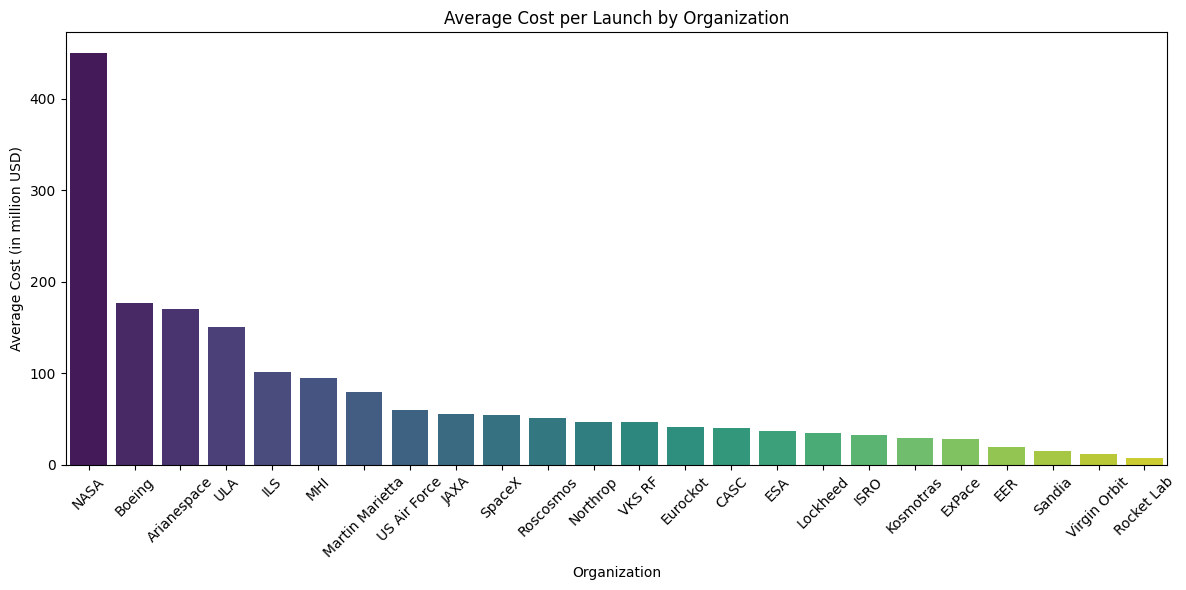

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x=average_cost_per_launch.index, y=average_cost_per_launch.values, palette='viridis')
plt.title('Average Cost per Launch by Organization')
plt.xlabel('Organization')
plt.ylabel('Average Cost (in million USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart the Number of Launches per Year

In [43]:
cp_clean_df = clean_df

In [44]:
cp_clean_df['Date'] = pd.to_datetime(cp_clean_df['Date'], format='%a %b %d, %Y %H:%M %Z', errors='coerce')
cp_clean_df['Year'] = cp_clean_df['Date'].dt.year
cp_clean_df['Year'] = cp_clean_df['Year'].fillna(0).astype(int)
print(cp_clean_df)

      Organisation                                           Location  \
0           SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1             CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
3        Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
5             CASC       LC-9, Taiyuan Satellite Launch Center, China   
...            ...                                                ...   
3855  US Air Force            SLC-4W, Vandenberg AFB, California, USA   
3971  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   
3993  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   
4000  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   
4020  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   

                          Date  \
0    2020-08-07 05:12:00+00:00   
1    2020-08-06 04:01:00+00:00   
3    2020-07-30 21:25

<ipython-input-44-41b1094ae216>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-41b1094ae216>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-41b1094ae216>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
launches_per_year = cp_clean_df.groupby('Year').size()

<ipython-input-46-30f78dbeeb91>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




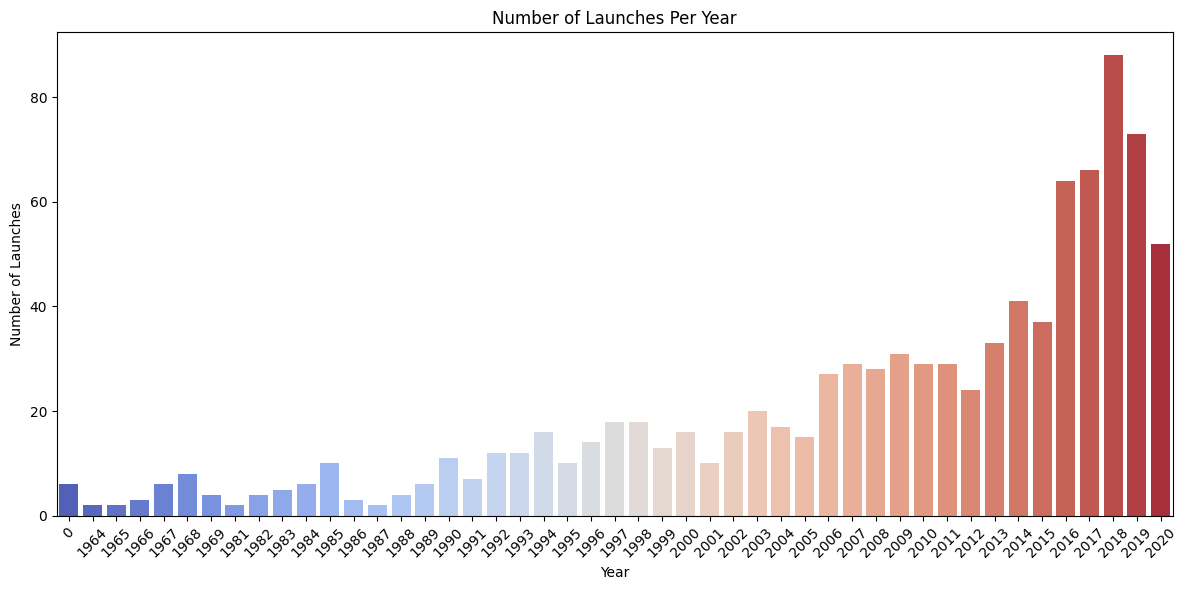

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x=launches_per_year.index, y=launches_per_year.values, palette='coolwarm')
plt.title('Number of Launches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [52]:
cp_clean_df['Year-Month'] =  cp_clean_df['Date'].dt.to_period('M')
launches_per_month = cp_clean_df.groupby('Year-Month').size().reset_index(name='Launches')
launches_per_month['Year-Month'] = launches_per_month['Year-Month'].astype(str)
launches_per_month

<ipython-input-52-2f01917dcb11>:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

<ipython-input-52-2f01917dcb11>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year-Month,Launches
0,1964-09,1
1,1964-12,1
2,1965-02,1
3,1965-05,1
4,1966-07,1
...,...,...
369,2020-04,4
370,2020-05,6
371,2020-06,7
372,2020-07,12


In [53]:
fig = px.line(
    launches_per_month,
    x='Year-Month',
    y='Launches',
    title='Number of Launches Month-on-Month',
    labels={'Year-Month': 'Year-Month', 'Launches': 'Number of Launches'},
    markers=True
)
fig.update_layout(
    xaxis=dict(showgrid=True, tickangle=45),
    yaxis=dict(showgrid=True),
    template='plotly_white',
    title_font_size=20,
    title_x=0.5  # Center the title
)

fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [54]:
launches_per_month = launches_per_month.sort_values(by='Launches', ascending=False)

most_popular = launches_per_month.iloc[0]
least_popular = launches_per_month.iloc[-1]

print("Most Popular Month:")
print(most_popular)

print("\nLeast Popular Month:")
print(least_popular)

Most Popular Month:
Year-Month    2020-07
Launches           12
Name: 372, dtype: object

Least Popular Month:
Year-Month    2004-04
Launches            1
Name: 187, dtype: object


In [57]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

cp_clean_df['Season'] = cp_clean_df['Date'].dt.month.apply(lambda x: get_season(x) if pd.notna(x) else None)

# Step 3: Count launches per season
launches_per_season = cp_clean_df['Season'].value_counts().reset_index()
launches_per_season.columns = ['Season', 'Launches']

# Step 4: Find the best time of year
best_season = launches_per_season.iloc[0]

print("Launches Per Season:")
print(launches_per_season)

print("\nBest Time of Year for Space Missions:")
print(f"Most launches occur in {best_season['Season']} with {best_season['Launches']} launches.")


Launches Per Season:
   Season  Launches
0  Spring       244
1    Fall       243
2  Summer       242
3  Winter       214

Best Time of Year for Space Missions:
Most launches occur in Spring with 244 launches.


<ipython-input-57-bffd2a59006b>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [59]:
fig = px.scatter(
    cp_clean_df,
    x='Date',
    y='Price',
    title='Launch Price Variation Over Time',
    labels={'Launch Date': 'Date', 'Launch Price (USD)': 'Launch Price (USD)'},
    trendline='ols',  # Add trendline (optional)
    template='plotly_white'
)

fig.update_traces(marker=dict(size=10, color='blue'))
fig.update_layout(title_x=0.5)

fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [61]:
org_counts = cp_clean_df['Organisation'].value_counts().head(10).index  # Top 10 organizations
filtered_data = cp_clean_df[cp_clean_df['Organisation'].isin(org_counts)]  # Filter by top 10 organizations

launches_by_org = filtered_data.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')

In [63]:
fig = px.line(
    launches_by_org,
    x='Year',
    y='Launches',
    color='Organisation',
    title='Number of Launches Over Time by Top 10 Organizations',
    labels={'Year': 'Year', 'Launches': 'Number of Launches', 'Organization': 'Organization'},
    markers=True
)

fig.update_layout(
    template='plotly_white',
    title_x=0.5,
    legend_title_text='Organizations'
)
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [66]:
print(cp_clean_df['country_name'].unique())

['USA' 'China' 'Kazakhstan' 'Japan' 'Zealand' 'Russia' 'France' 'India'
 'Sea' 'Facility' 'Canaria']


In [70]:
filtered_data = cp_clean_df[(cp_clean_df['country_name'].isin(['USA', 'Russia'])) & (cp_clean_df['Year'] <= 1991)]

launches_by_country = filtered_data.groupby(['Year', 'country_name']).size().reset_index(name='Launches')

In [71]:
fig = px.line(
    launches_by_country,
    x='Year',
    y='Launches',
    color='country_name',
    title='Number of Launches (USA vs Russia) Until 1991',
    labels={'Year': 'Year', 'Launches': 'Number of Launches', 'Country': 'Country'},
    markers=True
)

fig.update_layout(template='plotly_white', title_x=0.5, legend_title_text='country_name')
fig.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [77]:
new_filtered_data = cp_clean_df[(cp_clean_df['country_name'].isin(['USA', 'Russia','Kazakhstan']))]
new_launches_by_country = new_filtered_data.groupby(['Year', 'country_name']).size().reset_index(name='Launches')

fig = px.line(
    new_launches_by_country,
    x='Year',
    y='Launches',
    color='country_name',
    title='Number of Launches (USA vs Russia)',
    labels={'Year': 'Year', 'Launches': 'Number of Launches', 'Country': 'Country'},
    markers=True
)

fig.update_layout(template='plotly_white', title_x=0.5, legend_title_text='country_name')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?